In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#iported csv data from github

df = pd.read_csv("solar_summary.csv")

In [3]:
#created data frame variable 
df_climate = pd.read_csv("BuildingClimateZonesByZIPCode.csv")

In [4]:
#printed the columns with top 5 values
df.head()

,Incentive Program,System Size kw,zipcode,Cost Per Watt,Utility Company,County,Solar Energy Production kwh,Building CZ,Population,Housing Units,land_area_sq_mi,Electricity Production Millions of kWh (GWh)
0,California Public Utilities Commission (Non-CS...,7.0672,93720,3.162497,Pacific Gas & Electric Company,Fresno,11080.851980,13,930450,315531,5958,2674.195219
1,California Public Utilities Commission (Non-CS...,6.5604,93720,1.704481,Pacific Gas & Electric Company,Fresno,9368.967142,13,930450,315531,5958,2674.195219
2,California Public Utilities Commission (Non-CS...,6.5604,93720,1.704481,Pacific Gas & Electric Company,Fresno,9008.908333,13,930450,315531,5958,2674.195219
3,California Public Utilities Commission (Non-CS...,9.9320,93720,4.063711,Pacific Gas & Electric Company,Fresno,14009.671590,13,930450,315531,5958,2674.195219
4,California Public Utilities Commission (Non-CS...,8.2005,93720,4.208194,Pacific Gas & Electric Company,Fresno,10891.724510,13,930450,315531,5958,2674.195219


In [6]:
#created data frame variable with zip codes and size kW
df_size_zip = df[["zipcode","System Size kw"]]

In [7]:
df_size_zip.head()

,zipcode,System Size kw
0,93720,7.0672
1,93720,6.5604
2,93720,6.5604
3,93720,9.9320
4,93720,8.2005


In [8]:
# I loop around the zip codes indexes rather than the elements itself, on every iteration I take first element of that
#zipcode using index , search for it in df_size_zip data frame zipcode column , if found then I have to average its size_kw column
#for all the instances of that specific zip code found. This average is put in a new data frame created with its 
# respective zip code 
zipcodes = df_size_zip["zipcode"].unique()
zipcodes.sort()
df_new = pd.DataFrame(index=range(len(zipcodes)),columns=["zipcode","avg_size_kw"])

for i in range(len(zipcodes)):
    b = df_size_zip[df_size_zip["zipcode"]== zipcodes[i]]
    avg = b.mean()
    df_new.iloc[i,:] = [int(avg["zipcode"]),avg["System Size kw"]]
    
    


In [9]:
df_new.head()

,zipcode,avg_size_kw
0,90001,10.3402
1,90002,3.87013
2,90003,4.08442
3,90004,9.97967
4,90005,9.77667


In [10]:
df_climate.head()

,zipcode,Building CZ
0,90001,8
1,90002,8
2,90003,8
3,90004,9
4,90005,9


In [11]:
#I wanted to see if the area zip codes are corresponding with climate zone zip codes
df_climate["zipcode"].unique()

array([90001, 90002, 90003, ..., 96160, 96161, 96162])

In [12]:
#I had to convert the string "zipcode" to an integer in order to merge these two data frames together.
df_new["zipcode"] = df_new["zipcode"].astype(int)
df_new["avg_size_kw"]=df_new["avg_size_kw"].astype(float)


In [13]:
#merging average size b zip code with climate zones
df_merge = df_climate.merge(df_new)

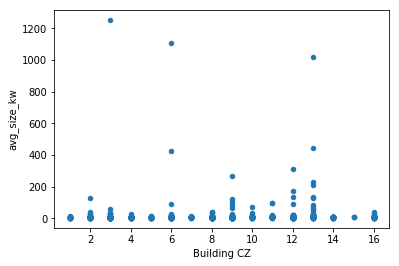

In [14]:
#%matplotlib inline used in case the scatter plot itself  wouldn't show up

df_merge.plot.scatter(x="Building CZ", y="avg_size_kw");

In [15]:
#CONCLUSION:
#There is no correlation between the climate zone and the size of the solar panels installations. 
